In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
data= pd.read_csv('advertising.csv')

In [4]:
data.head(10)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,27/03/2016 0:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,04/04/2016 1:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,13/03/2016 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,10/01/2016 2:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,03/06/2016 3:36,0
5,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,19/05/2016 14:30,0
6,88.91,33,53852.85,208.36,Enhanced dedicated support,Brandonstad,0,Myanmar,28/01/2016 20:59,0
7,66.00,48,24593.33,131.76,Reactive local challenge,Port Jefferybury,1,Australia,07/03/2016 1:40,1
8,74.53,30,68862.00,221.51,Configurable coherent function,West Colin,1,Grenada,18/04/2016 9:33,0
9,69.88,20,55642.32,183.82,Mandatory homogeneous architecture,Ramirezton,1,Ghana,11/07/2016 1:42,0


## How 'gender' of the person, affects the user advertisement click.

In [5]:
def convereter(x):
    if x==0:
        return 'female'
    else:
        return 'male'

In [6]:
data['Gender']= data['Male'].apply(convereter)

In [7]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Gender
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,27/03/2016 0:53,0,female
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,04/04/2016 1:39,0,male
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,13/03/2016 20:35,0,female
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,10/01/2016 2:31,0,male
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,03/06/2016 3:36,0,female


In [8]:
new= data.groupby('Gender')['Clicked on Ad'].value_counts()

In [9]:
new

Gender  Clicked on Ad
female  1                236
        0                229
male    0                232
        1                203
Name: Clicked on Ad, dtype: int64

In [10]:
male=data['Gender'][data['Gender']=='male'].count()
female=data['Gender'][data['Gender']=='female'].count()

In [11]:
percentage_share_female = new[0:2].apply( lambda x: round( 100 * x /female))
percentage_share_male = new[2:5].apply( lambda x: round( 100 * x /male))

In [12]:
percentage=percentage_share_male.append(percentage_share_female)

In [13]:
percentage

Gender  Clicked on Ad
male    0                53.0
        1                47.0
female  1                51.0
        0                49.0
Name: Clicked on Ad, dtype: float64

In [14]:
font ={
    'size':18,
    'weight':'bold'
}

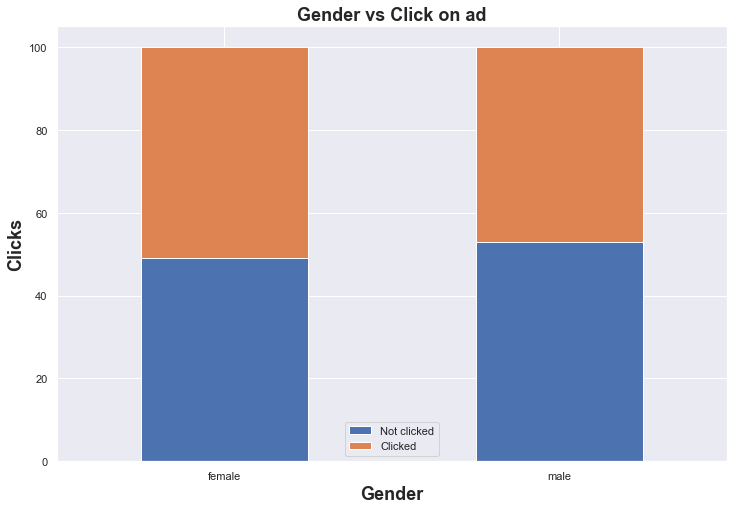

In [64]:
sns.set(rc={'figure.figsize' : (12,8)})
ax=percentage.unstack().plot(kind='bar',stacked=True)
plt.xticks(rotation=0)
ax.legend(['Not clicked','Clicked'])
plt.xlabel('Gender',fontdict=font)
plt.ylabel('Clicks',fontdict=font)
plt.title('Gender vs Click on ad',fontdict=font)
plt.savefig("Gender vs Click on ad")

## 1. How 'age' of the person, affects the user advertisement click.

In [16]:
font ={
    'size':18,
    'weight':'bold'
}

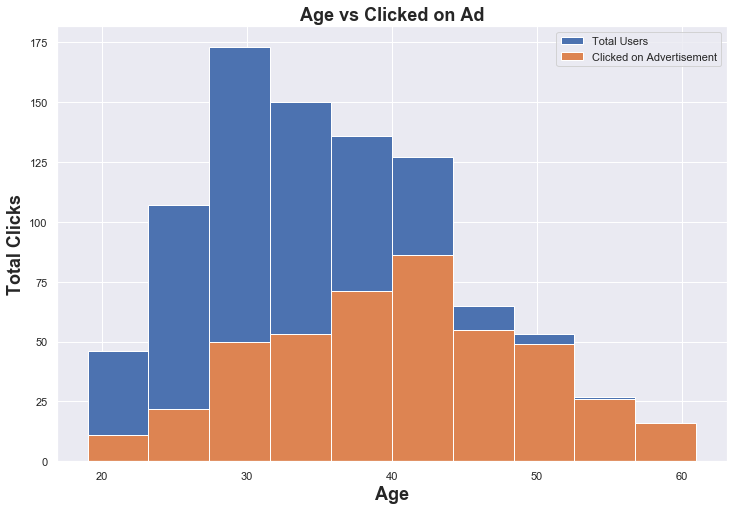

In [65]:
plt.figure(figsize=(12,8))
plt.hist(data['Age'],label='Total Users')
plt.hist(data['Age'][data['Clicked on Ad']==1],label='Clicked on Advertisement')
plt.xlabel('Age',fontdict=font)
plt.ylabel('Total Clicks',fontdict=font)
plt.legend()
plt.title('Age vs Clicked on Ad',fontdict=font)
plt.savefig('Age vs Clicked on Ad')

C:\Users\jyoti\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Affect of Age on Ad Click')

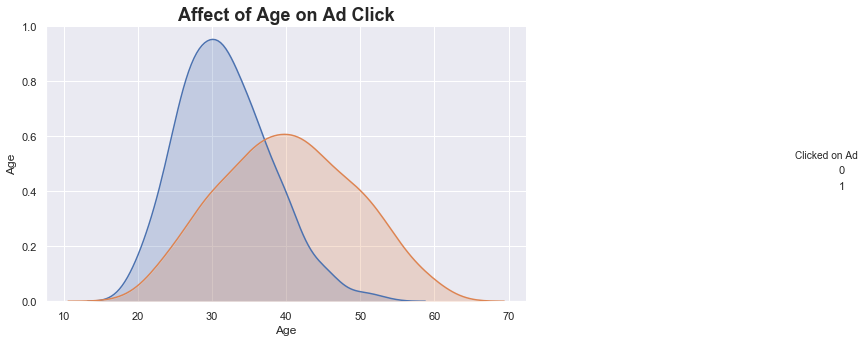

In [18]:
g=sns.pairplot(data,hue="Clicked on Ad",vars=['Age'])
g.fig.set_figheight(6)
g.fig.set_figwidth(16)
plt.title('Affect of Age on Ad Click',fontdict=font)


## How 'country' of the person, affects the user advertisement click.

In [32]:
new_data=pd.crosstab(data['Country'], data['Clicked on Ad'])

In [33]:
new_data[:5]

Clicked on Ad,0,1
Country,,
Afghanistan,2,5
Albania,3,3
Algeria,3,3
American Samoa,2,3
Andorra,0,2


In [34]:
new_data['total']=new_data.sum(axis=1)

In [35]:
new_data.head(10)

Clicked on Ad,0,1,total
Country,,,
Afghanistan,2,5,7
Albania,3,3,6
Algeria,3,3,6
American Samoa,2,3,5
Andorra,0,2,2
Angola,3,1,4
Anguilla,3,3,6
Antarctica (the territory South of 60 deg S),1,2,3
Antigua and Barbuda,1,4,5


In [36]:
percent_data=new_data.apply(lambda x:round(100 *x/new_data['total']))

In [37]:
percent_data[:5]

Clicked on Ad,0,1,total
Country,,,
Afghanistan,29.0,71.0,100.0
Albania,50.0,50.0,100.0
Algeria,50.0,50.0,100.0
American Samoa,40.0,60.0,100.0
Andorra,0.0,100.0,100.0


In [38]:
percent_data.drop('total',axis=1,inplace=True)

In [39]:
percent_data = percent_data[percent_data[1] > 80]

In [40]:
percent_data = percent_data.sort_values(1, ascending=False)

In [41]:
percent_data.shape[0]

30

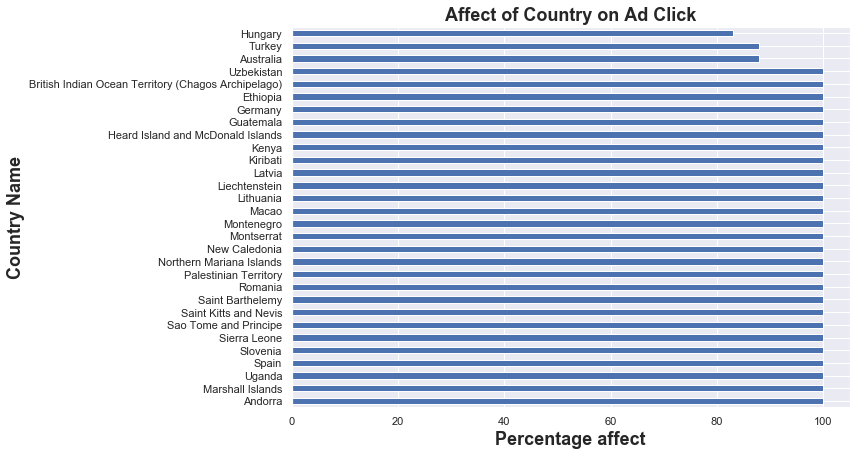

In [66]:
plt.figure(figsize=(10, 7))
percent_data[1].plot(kind='barh')
plt.xlabel('Percentage affect',fontdict=font)
plt.ylabel('Country Name',fontdict=font)
plt.title('Affect of Country on Ad Click',fontdict=font)
plt.savefig('Affect of Country on Ad Click')

## How 'daily internet usage' of the person, affects the user advertisement click.

In [45]:
data.head(1)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Gender
0,68.95,35,61833.9,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,27/03/2016 0:53,0,female


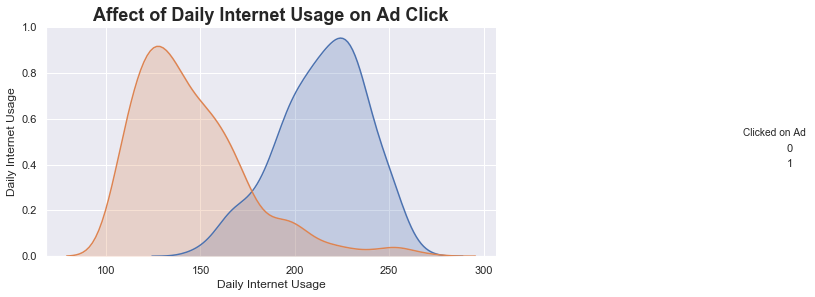

In [70]:
g=sns.pairplot(data,hue="Clicked on Ad",vars=['Daily Internet Usage'],markers=["o","b"])
g.fig.set_figheight(5)
g.fig.set_figwidth(15)
plt.title('Affect of Daily Internet Usage on Ad Click',fontdict=font)
plt.savefig('Affect of Daily Internet Usage on Ad Click')

## Prediction

In [77]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Gender
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,27/03/2016 0:53,0,female
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,04/04/2016 1:39,0,male
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,13/03/2016 20:35,0,female
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,10/01/2016 2:31,0,male
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,03/06/2016 3:36,0,female


In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 11 columns):
Daily Time Spent on Site    900 non-null float64
Age                         900 non-null int64
Area Income                 900 non-null float64
Daily Internet Usage        900 non-null float64
Ad Topic Line               900 non-null object
City                        900 non-null object
Male                        900 non-null int64
Country                     900 non-null object
Timestamp                   900 non-null object
Clicked on Ad               900 non-null int64
Gender                      900 non-null object
dtypes: float64(3), int64(3), object(5)
memory usage: 77.4+ KB


In [79]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'],infer_datetime_format=True)

In [80]:
data['Year'] = pd.DatetimeIndex(data['Timestamp']).year

In [81]:
data['Month'] = pd.DatetimeIndex(data['Timestamp']).month

In [82]:
data['Date'] = data['Timestamp'].dt.day

In [83]:
data['Hour'] = data['Timestamp'].dt.hour

In [84]:
data['Minute'] = data['Timestamp'].dt.minute

In [85]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Gender,Year,Month,Date,Hour,Minute
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:00,0,female,2016,3,27,0,53
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:00,0,male,2016,4,4,1,39
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:00,0,female,2016,3,13,20,35
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:00,0,male,2016,1,10,2,31
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:00,0,female,2016,6,3,3,36


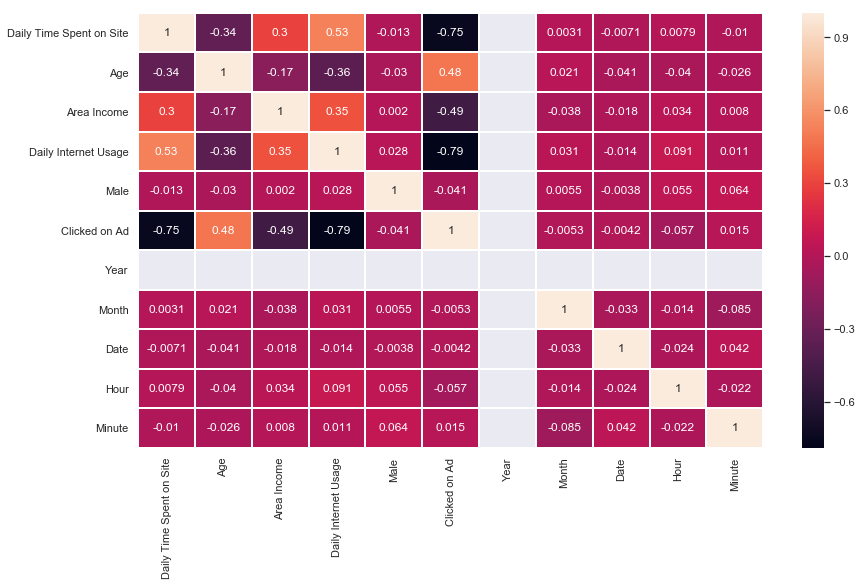

In [86]:
plt.figure(figsize=(14,8))
sns.heatmap( data.corr() , annot=True ,linecolor='w' , linewidths=1)

In [87]:
data.head(1)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Gender,Year,Month,Date,Hour,Minute
0,68.95,35,61833.9,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:00,0,female,2016,3,27,0,53


In [88]:
training_data = data[['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage','Male','Month','Date','Hour','Minute']]

In [89]:
output_data = data['Clicked on Ad']

In [90]:
from sklearn.model_selection import train_test_split
X , x_test, Y , y_test = train_test_split( training_data , output_data , test_size=0.3 , random_state=5)

In [91]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X,Y)

C:\Users\jyoti\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [92]:
prediction = model.predict(x_test)

In [93]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion = confusion_matrix(prediction,y_test)

In [94]:
confusion

array([[131,  18],
       [  9, 112]], dtype=int64)

In [95]:
score = accuracy_score(prediction,y_test)

In [96]:
score

0.9

## Test data

In [97]:
test=pd.read_csv('test.csv')

In [98]:
test.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp
0,50.78,51,49957.00,122.04,Vision-oriented asynchronous Internet solution,West David,0,Liberia,11/02/2016 17:02
1,40.47,38,24078.93,203.90,Sharable 5thgeneration access,Fraziershire,0,Burundi,22/07/2016 7:44
2,45.62,43,53647.81,121.28,Monitored homogeneous artificial intelligence,Robertfurt,0,Macao,26/06/2016 2:34
3,84.76,30,61039.13,178.69,Monitored 24/7 moratorium,South Pamela,0,Venezuela,14/05/2016 23:08
4,80.64,26,46974.15,221.59,Vision-oriented real-time framework,North Laurenview,0,Luxembourg,24/05/2016 10:04


In [99]:
test_data = data[['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage','Male','Month','Date','Hour','Minute']]

In [100]:
test_pre = model.predict(test_data)

In [101]:
test_predictions_df= {
    'Daily Time Spent on Site' : test_data['Daily Time Spent on Site'],
    'Clicked on Ad':test_pre
}

In [102]:
test_predictions_df=pd.DataFrame(test_predictions_df)

test_predictions_df=test_predictions_df.set_index('Daily Time Spent on Site' )

test_predictions_df.head(2)

,Clicked on Ad
Daily Time Spent on Site,
68.95,0
80.23,0


In [103]:
test_predictions_df.to_csv('Prediction.csv')